In [6]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

chipotle_data = pandas.read_csv(url, sep = '\t')

chipotle_data.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [3]:
chipotle_data.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [4]:
chipotle_data.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [8]:
chipotle_data['quantity'].max()

np.int64(15)

In [ ]:
chipotle_data.sort_values(by='quantity', ascending=False)
# most ordered item: Chips and Fresh Tomato Salsa

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,$44.25
4152,1660,10,Bottled Water,NaN,$15.00
3887,1559,8,Side of Chips,NaN,$13.52
3599,1443,7,Bottled Water,NaN,$10.50
2441,970,5,Bottled Water,NaN,$7.50
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [17]:
chipotle_data['item-price'] = chipotle_data['item_price'].replace('[\$]', '', regex=True).astype(float)
chipotle_data['item-price'].sum()
# total money $34,500.16

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Kim Jong Un\AppData\Local\Temp\ipykernel_15244\1654764836.py:1: SyntaxWarning: invalid escape sequence '\$'
  chipotle_data['item-price'] = chipotle_data['item_price'].replace('[\$]', '', regex=True).astype(float)


np.float64(34500.16)

In [ ]:
chipotle_data['order_id'].max()
# chipotle_data.tail(1)
# 1834 orders in total

np.int64(1834)

In [ ]:
x = chipotle_data[chipotle_data['item-price'] > 10]
len(x['item_name'].unique())
# 31 items cost more than 10 dollar

31

In [30]:
chipotle_data['item_name'].unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

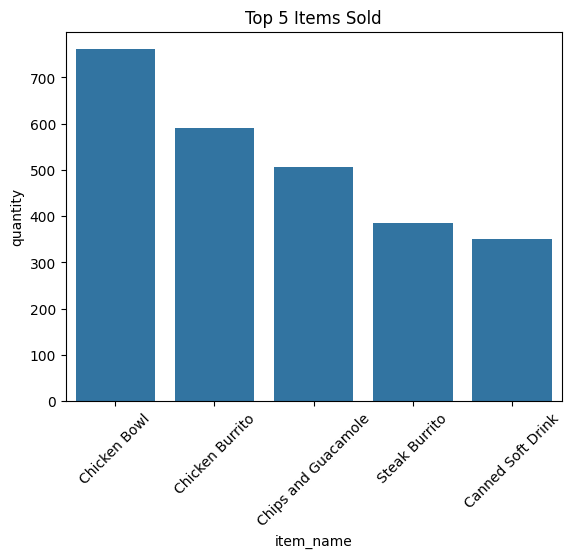

In [15]:
most_sold = chipotle_data.groupby('item_name')['quantity'].sum().nlargest(5)
most_sold
df = pd.DataFrame(most_sold)

seaborn.barplot(x='item_name', y='quantity', data=df)
plt.xticks(rotation=45)
plt.title("Top 5 Items Sold")
plt.show()

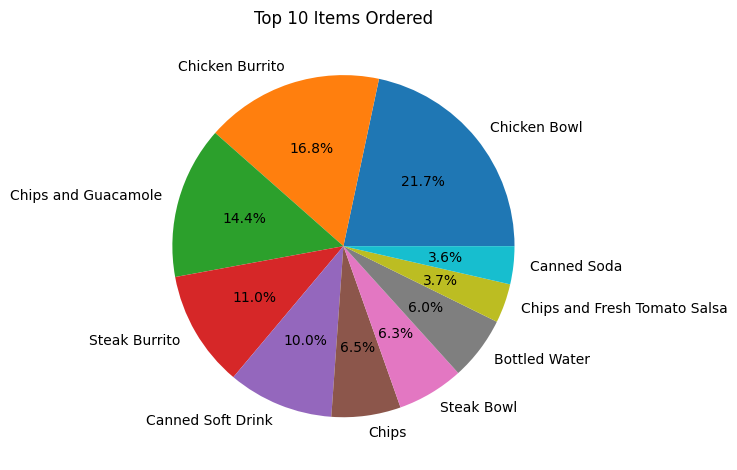

In [11]:
top_ten = chipotle_data.groupby('item_name')['quantity'].sum().nlargest(10)
plt.pie(top_ten, labels=top_ten.index, autopct='%1.1f%%')
plt.title("Top 10 Items Ordered")
plt.tight_layout()
plt.show()

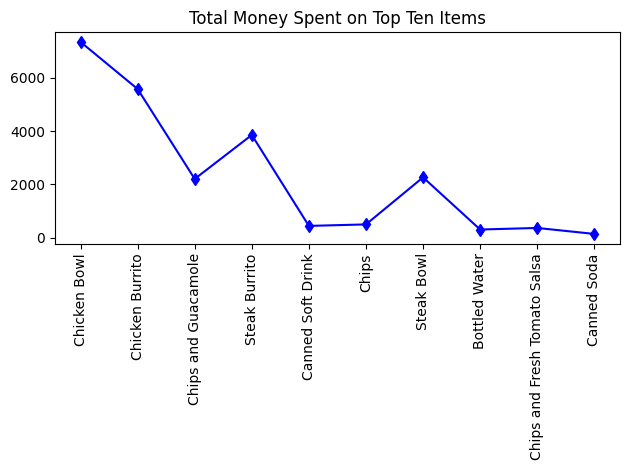

In [24]:
top_ten_with_price = chipotle_data.groupby('item_name')[["quantity", "item-price"]].sum().nlargest(10, "quantity")
top_ten_with_price

plt.plot(top_ten_with_price.index, top_ten_with_price['item-price'], marker='d', linestyle='-', color='blue')
plt.title('Total Money Spent on Top Ten Items')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [21]:
top_ten_with_price

,quantity,item-price
item_name,,
Chicken Bowl,761,7342.73
Chicken Burrito,591,5575.82
Chips and Guacamole,506,2201.04
Steak Burrito,386,3851.43
Canned Soft Drink,351,438.75
Chips,230,494.34
Steak Bowl,221,2260.19
Bottled Water,211,302.56
Chips and Fresh Tomato Salsa,130,361.36


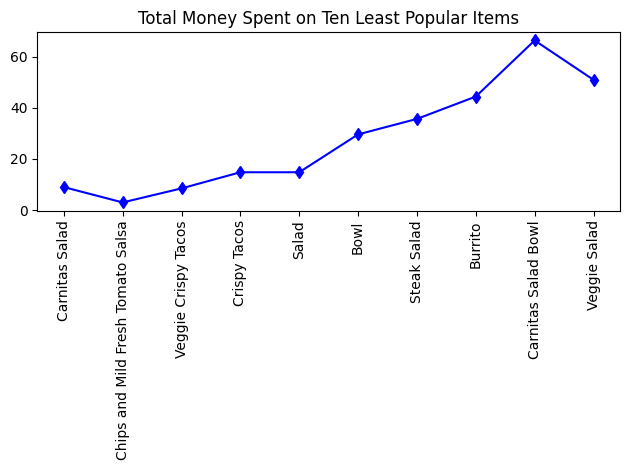

In [25]:
bottom_ten_with_price = chipotle_data.groupby('item_name')[["quantity", "item-price"]].sum().nsmallest(10, "quantity")
bottom_ten_with_price

plt.plot(bottom_ten_with_price.index, bottom_ten_with_price['item-price'], marker='d', linestyle='-', color='blue')
plt.title('Total Money Spent on Ten Least Popular Items')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()